In [1]:
import nltk
nltk.download('reuters')

from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Preprocess Reuters dataset
documents = []
stop_words = set(stopwords.words('english'))

for doc_id in reuters.fileids():
    words = word_tokenize(reuters.raw(doc_id).lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    documents.append(words)


[nltk_data] Downloading package reuters to C:\Users\Ibrahim
[nltk_data]     Reyad\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [2]:
# Compute dataset statistics
num_documents = len(documents)
vocab_size = len(set(word for doc in documents for word in doc))
avg_doc_length = sum(len(doc) for doc in documents) / num_documents

print(f'Number of documents: {num_documents}')
print(f'Vocabulary size: {vocab_size}')
print(f'Average document length: {avg_doc_length:.2f} words')


Number of documents: 10788
Vocabulary size: 27812
Average document length: 77.76 words


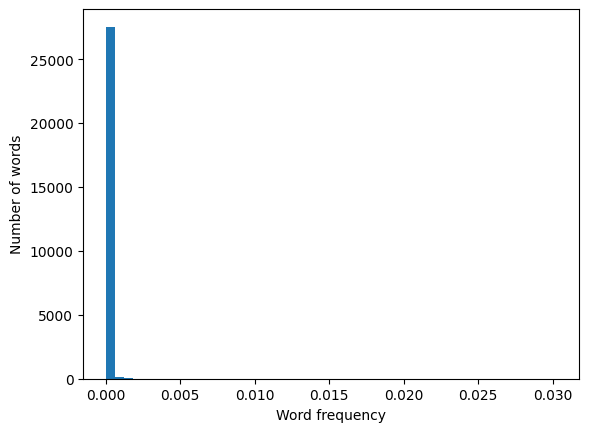

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

# Compute word frequency distribution
word_counts = Counter(word for doc in documents for word in doc)
word_freqs = [count / sum(word_counts.values()) for count in word_counts.values()]

# Plot word frequency distribution
plt.hist(word_freqs, bins=50)
plt.xlabel('Word frequency')
plt.ylabel('Number of words')
plt.show()


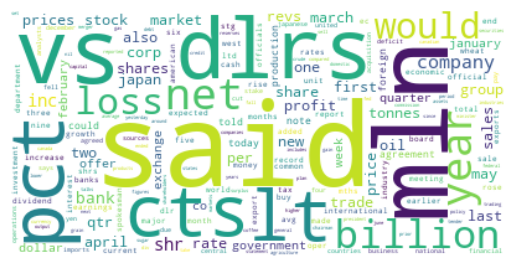

In [9]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_counts)

# Display word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
